<h1 style="text-align:center;">Workshop Training</h1> 

<h2 style="text-align:center;">LULC Analysis and Classification using Remote Sensing Data with Machine Learning Approach</h2> 

### Section 2: Data Structure, Exploratory Data Analysis and Machine Learning


In [2]:
import rasterio
import geopandas as gpd
import numpy as np

Simplest way to read and visualize the satellite image file is to use `rasterio` lib as following

In [79]:
# Use as local workshop
base_path = ''

# Use as running on Colab
# base_path = 'https://github.com/thanthamky/rs-lc-dl/raw/refs/heads/main/'

In [12]:
image_file = base_path+'s2_samples/S2A_MSIL2A_20211215T035151_R104_T47PNS_20211217T045043_aoi_B08.tif'

with rasterio.open(image_file) as src:
    
    image_data = src.read()

Since the image data is already numpy array of image dimension, matplotlib is allowed to be used

In [13]:
import matplotlib.pyplot as plt

plot type is `imshow` function following by image structure as (height, width) if 2 dimension, with 3 dimensions have to arrange them to shape (height, width, channel)

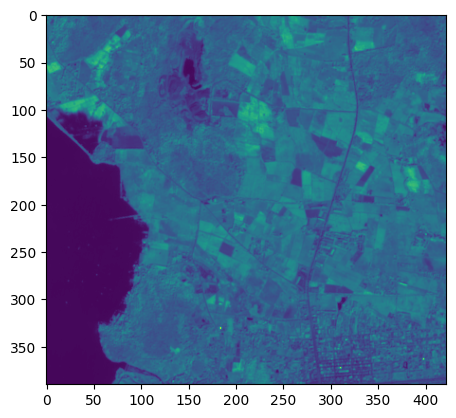

In [14]:
plt.imshow(image_data[0, :, :], norm='linear')

There are various raster files within a satellite dataset. Declare their paths into a list

In [19]:

image_files = ['s2_samples/S2A_MSIL2A_20211215T035151_R104_T47PNS_20211217T045043_aoi_B02.tif',
                's2_samples/S2A_MSIL2A_20211215T035151_R104_T47PNS_20211217T045043_aoi_B03.tif',
                's2_samples/S2A_MSIL2A_20211215T035151_R104_T47PNS_20211217T045043_aoi_B04.tif',
                's2_samples/S2A_MSIL2A_20211215T035151_R104_T47PNS_20211217T045043_aoi_B08.tif',
                's2_samples/S2A_MSIL2A_20211215T035151_R104_T47PNS_20211217T045043_aoi_B11.tif',
                's2_samples/S2A_MSIL2A_20211215T035151_R104_T47PNS_20211217T045043_aoi_B12.tif']

Employ subplot capabilities to show multiple image to show

/var/folders/d1/pv_vgtx525d9v64kb01fvbz80000gn/T/ipykernel_83569/1369649732.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show() # show plot


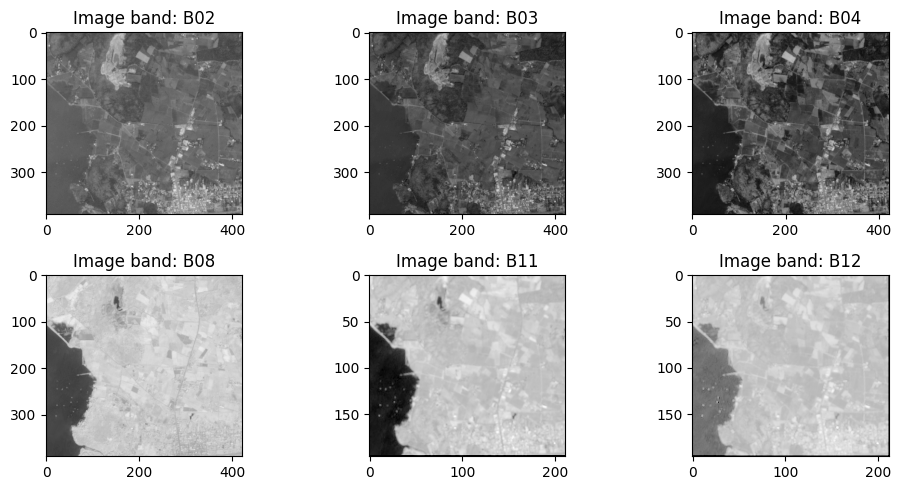

In [20]:
fig, ax = plt.subplots(2, 3, figsize=(10,5)) # create subplots by 2 rows, 3 cols, with figure size 10 x 5

ax = ax.flatten() # The axis to plot is row,col oriented, flatten them to single rows

for ax_idx, image_file in enumerate(image_files): # iterate over image files

    with rasterio.open(image_file) as src: # open raster file
        
        ax[ax_idx].imshow(src.read(1), norm='log', cmap='gray') # show image
        ax[ax_idx].set_title(f'Image band: {image_file[-7:-4]}') # set title

fig.tight_layout() # make figure layout more tight
fig.show() # show plot

After knowing how to read raster file, how about vector file like `.shp` or `.geojson`. Also, this workshop prefers `.geosjon` since out system or cloud-populated usually geojson with a single file handling.

<br>

lib `geopandas` can handle many file formats and simple to use like `pandas` dataframe

In [21]:
sample_file = 'aoi_samples.geojson'

sample_points = gpd.read_file(base_path+sample_file)

How it looks like

In [22]:
sample_points

,id,class_id,geometry
0,0,3,POINT (575119.892 1640891.072)
1,1,3,POINT (573318.351 1641567.971)
2,2,1,POINT (572988.971 1643364.415)
3,3,4,POINT (573804.683 1642372.301)
4,4,4,POINT (573076.365 1641690.218)
...,...,...,...
852,852,3,POINT (571764.703 1643893.533)
853,853,1,POINT (575024.216 1641388.558)
854,854,1,POINT (571803.205 1644676.474)
855,855,1,POINT (573130.942 1643395.646)


On the other hand, geometry of points can be accessible by this

In [23]:
sample_points.geometry

0      POINT (575119.892 1640891.072)
1      POINT (573318.351 1641567.971)
2      POINT (572988.971 1643364.415)
3      POINT (573804.683 1642372.301)
4      POINT (573076.365 1641690.218)
                    ...              
852    POINT (571764.703 1643893.533)
853    POINT (575024.216 1641388.558)
854    POINT (571803.205 1644676.474)
855    POINT (573130.942 1643395.646)
856    POINT (572590.837 1643381.111)
Name: geometry, Length: 857, dtype: geometry

This is an essential process. we would use those point geometry to extract raster values where the points are. and save into its geodataframe columns. First, create a function that do raster values sampling

In [24]:
def extract_raster_values_to_points(raster_file, point_geometry):
    with rasterio.open(raster_file) as src: 
        values = [] 
        for point in point_geometry:
            #print(point)
            coords = (point.x, point.y)
            value = list(src.sample([coords]))[0][0]
            values.append(value) 
    return values

Then, we can iterate over image file list to do raster values sampling and dump it to existing geodataframe columns like

In [25]:
for raster_file in image_files:
    
    band_name = raster_file[-7:-4]
    
    sample_points[band_name] = extract_raster_values_to_points(raster_file, sample_points.geometry)

This is how it looks like

In [26]:
sample_points

,id,class_id,geometry,B02,B03,B04,B08,B11,B12
0,0,3,POINT (575119.892 1640891.072),644,958,1124,2814,3526,2286
1,1,3,POINT (573318.351 1641567.971),363,631,554,1992,1917,982
2,2,1,POINT (572988.971 1643364.415),286,441,277,3134,1662,757
3,3,4,POINT (573804.683 1642372.301),247,417,335,1670,1564,723
4,4,4,POINT (573076.365 1641690.218),428,765,450,4744,2399,1236
...,...,...,...,...,...,...,...,...,...
852,852,3,POINT (571764.703 1643893.533),429,685,651,2854,2132,1221
853,853,1,POINT (575024.216 1641388.558),501,720,590,2696,1943,1258
854,854,1,POINT (571803.205 1644676.474),308,473,463,2058,1920,1061
855,855,1,POINT (573130.942 1643395.646),321,588,408,2812,1878,869


## Exploratory Data Analysis

The step of dataset preparation was done. Before beginning for anay analysis, exploratory analysis is needed to understanding how balance, distribute, histogram and etc. neccessary to help more intuition of dataset

In [27]:
class_counts =sample_points['class_id'].value_counts().sort_index().to_dict()

class_counts

{1: 248, 3: 46, 4: 382, 5: 79, 6: 9, 8: 91, 9: 2}

Reference data was constructued using `class_id` code which is not readable by the human. there should be some description of class_id using `Dictionary`

In [28]:
class_name = {
    1: 'Vegetation',
    2: 'Shrubland',
    3: 'Grasland',
    4: 'Cropland',
    5: 'Built-up',
    6: 'Bareland',
    7: 'Snow and Ice',
    8: 'Water',
    9: 'Herbal Wetland'
}

class_color = {
    1: 'darkgreen',
    2: 'orange',
    3: 'yellow',
    4: 'magenta',
    5: 'red',
    6: 'gray',
    7: 'white',
    8: 'blue',
    9: 'purple'
}

First of all is sample balance plot. It shows number of samples of each class_id by bar chart

/var/folders/d1/pv_vgtx525d9v64kb01fvbz80000gn/T/ipykernel_83569/3060554065.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


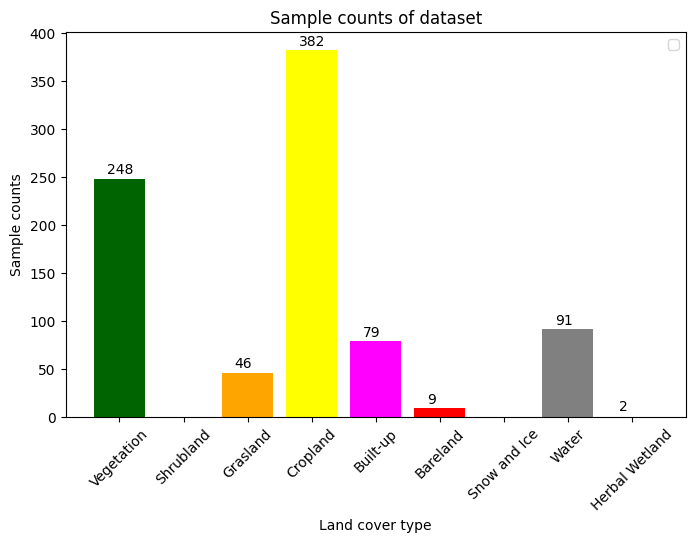

In [29]:
plt.figure(figsize=(8,5))

plt.bar(class_counts.keys(), class_counts.values(), color=class_color.values())

for class_id, counts in class_counts.items():
    
    plt.text(class_id-0.20, counts+5, f'{counts}')
    

plt.xticks(list(class_name.keys()), list(class_name.values()), rotation=45)

plt.ylabel('Sample counts')
plt.xlabel('Land cover type')

plt.title('Sample counts of dataset')

plt.legend()
plt.show()

To show histogram of each LULC class, pyplot implement `plt.hist`

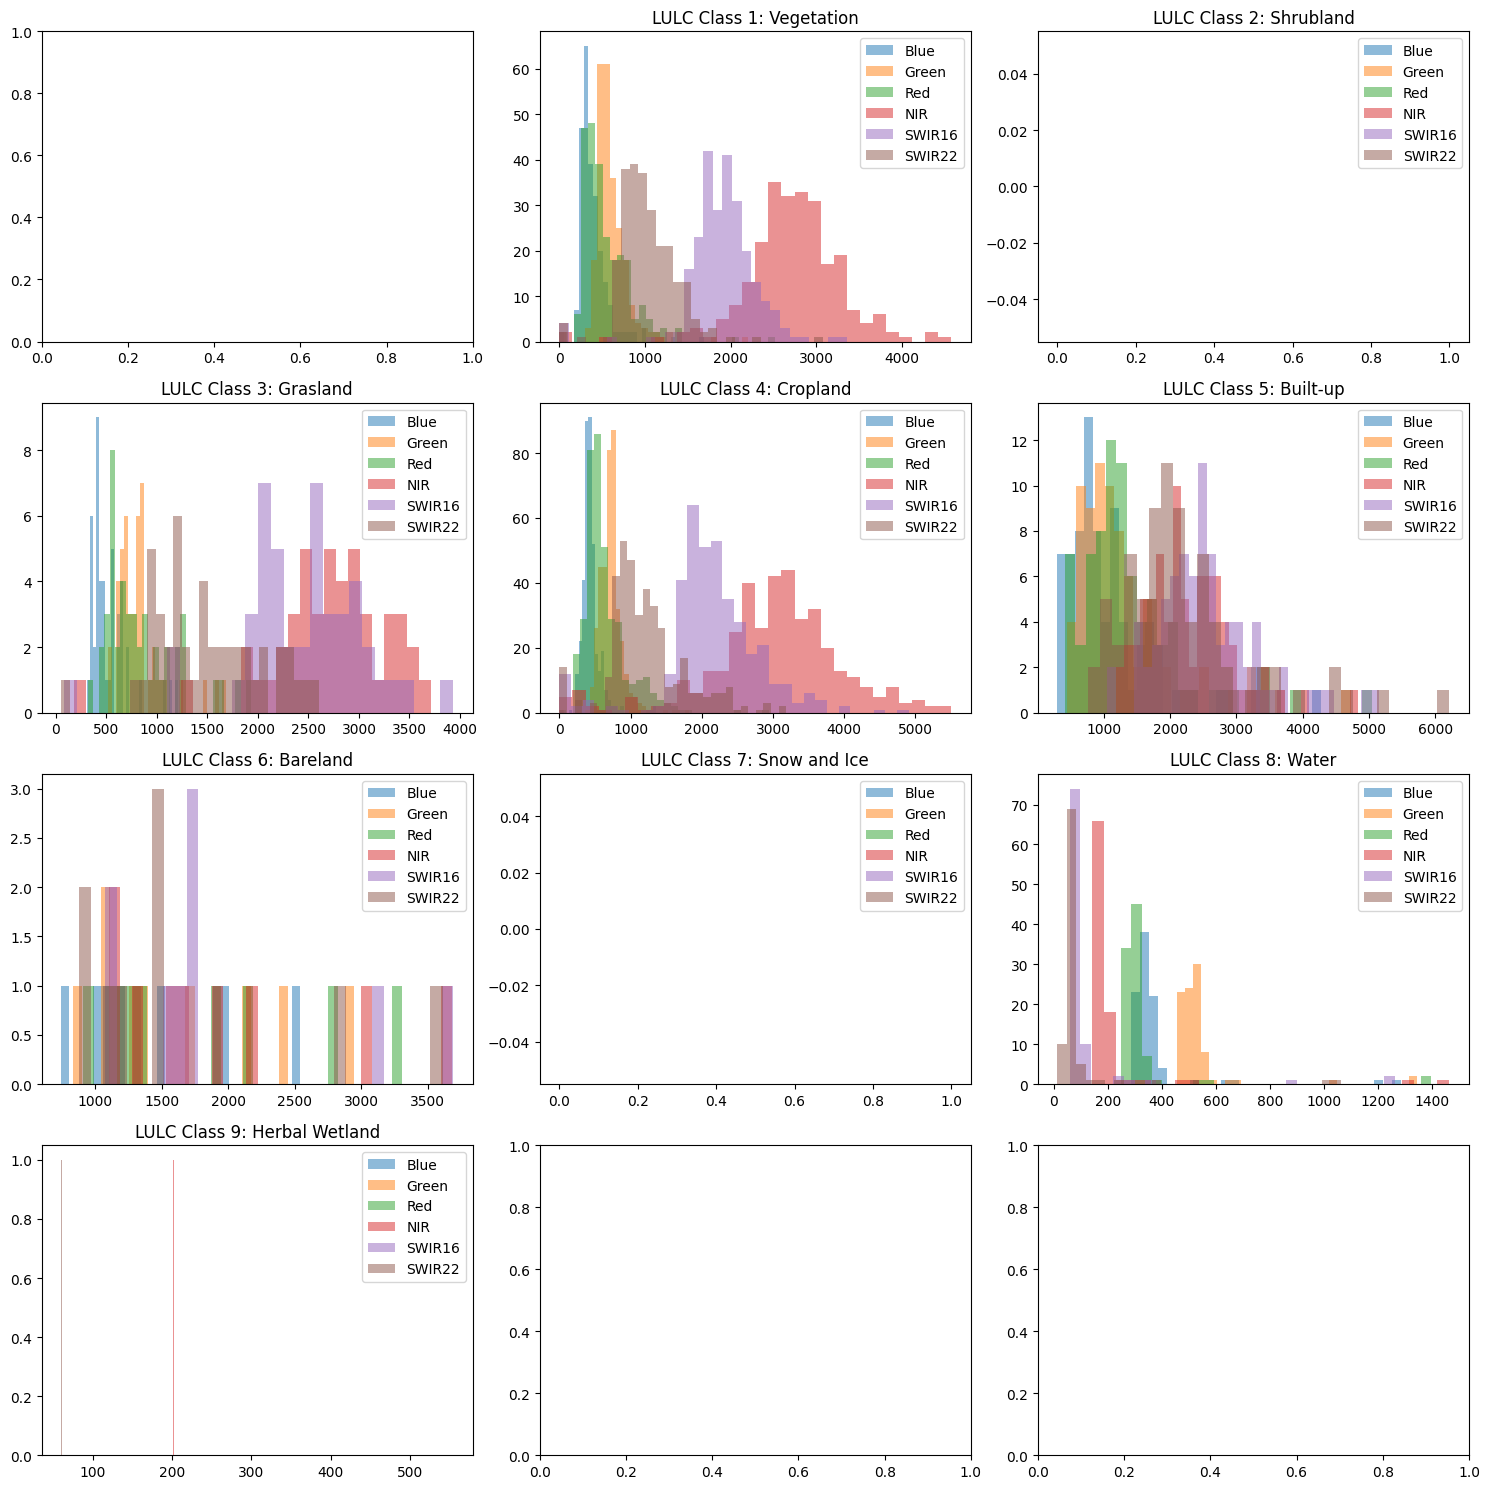

In [30]:
fig, ax = plt.subplots(4, 3, figsize=(15,15))

ax = ax.flatten()

for class_id, class_label in class_name.items():

    ax[class_id].hist(sample_points[sample_points['class_id'] == class_id].loc[:, 'B02'], label='Blue', bins=30, alpha=.5)
    ax[class_id].hist(sample_points[sample_points['class_id'] == class_id].loc[:, 'B03'], label='Green', bins=30, alpha=.5)
    ax[class_id].hist(sample_points[sample_points['class_id'] == class_id].loc[:, 'B04'], label='Red', bins=30, alpha=.5)
    ax[class_id].hist(sample_points[sample_points['class_id'] == class_id].loc[:, 'B08'], label='NIR', bins=30, alpha=.5)
    ax[class_id].hist(sample_points[sample_points['class_id'] == class_id].loc[:, 'B11'], label='SWIR16', bins=30, alpha=.5)
    ax[class_id].hist(sample_points[sample_points['class_id'] == class_id].loc[:, 'B12'], label='SWIR22', bins=30, alpha=.5)

    ax[class_id].set_title(f'LULC Class {class_id}: {class_label}')
    ax[class_id].legend()
    
fig.tight_layout()

As well as the spectral signature, LULC class is able to be visualized as spectral profile by samples summary

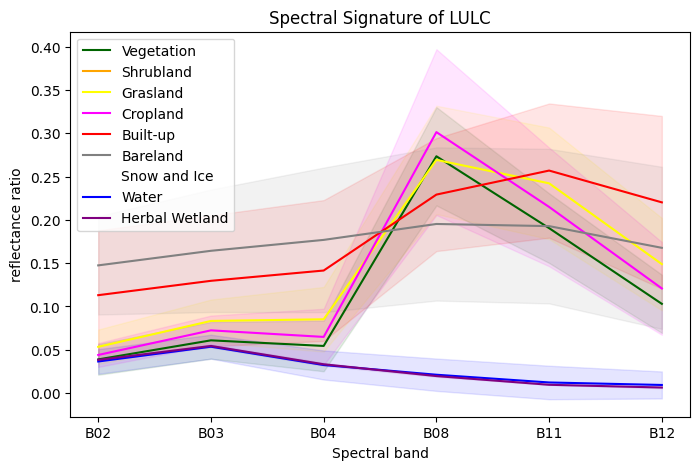

In [31]:
plt.figure(figsize=(8, 5))

for class_id in class_name.keys():
    
    #dataset_df[dataset_df['class_id'] == class_id].iloc[:, 3:].mean(axis=0)
    
    mean_spectral = sample_points[sample_points['class_id'] == class_id].iloc[:, 3:].mean(axis=0) / 10000
    std_spectral = sample_points[sample_points['class_id'] == class_id].iloc[:, 3:].std(axis=0) / 10000

    upper_std = mean_spectral + std_spectral
    lower_std = mean_spectral - std_spectral 
    
    #idx, smooth_line = smoothen_line(np.arange(len(mean_spectral)), mean_spectral)
    
    plt.plot(mean_spectral, color=class_color[class_id], label=f'{class_name[class_id]}')
    #plt.plot(idx, smooth_line, color=class_color[class_id], label=f'{class_name[class_id]}')
    plt.fill_between(mean_spectral.index, upper_std, lower_std, color=class_color[class_id], alpha=.1) 

plt.xticks(np.arange(len(mean_spectral)), ['B02', 'B03', 'B04', 'B08', 'B11', 'B12'])

plt.ylabel('reflectance ratio')
plt.xlabel('Spectral band')

plt.title('Spectral Signature of LULC')

plt.legend()
plt.show()

The previous plot may too pickling to show, it is better to smoothen them by this function

In [34]:
from scipy.interpolate import make_interp_spline

def smoothen_line(x, y):
    
    X_Y_Spline = make_interp_spline(x, y)
 
    # Returns evenly spaced numbers
    # over a specified interval.
    X_ = np.linspace(x.min(), x.max(), 500)
    Y_ = X_Y_Spline(X_)
    
    return X_, Y_

Try to plot smoother spectral signature line

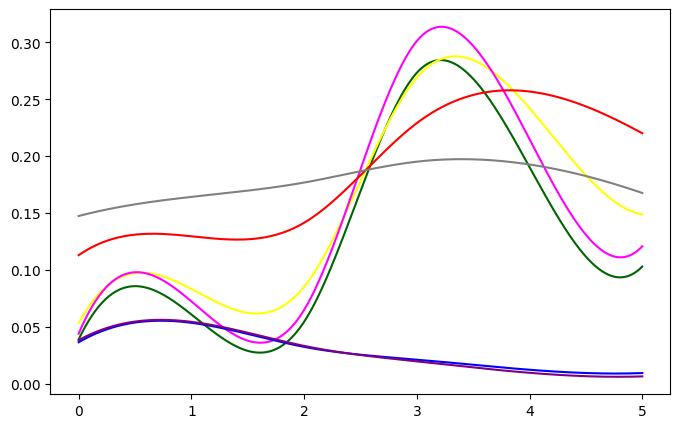

In [33]:
plt.figure(figsize=(8, 5))

for class_id in class_counts.keys():
    
    mean_spectral = sample_points[sample_points['class_id'] == class_id].iloc[:, 3:].mean(axis=0) / 10000
    std_spectral = sample_points[sample_points['class_id'] == class_id].iloc[:, 3:].std(axis=0) / 10000

    upper_std = mean_spectral + std_spectral
    lower_std = mean_spectral - std_spectral 
    
    idx, smooth_line = smoothen_line(np.arange(len(mean_spectral)), mean_spectral)
    
    plt.plot(idx, smooth_line, color=class_color[class_id], label=f'{class_name[class_id]}')


#plt.xticks(np.arange(len(mean_spectral)), ['B02', 'B03', 'B04', 'B08', 'B11', 'B12'])

#plt.ylabel('reflectance ratio')
#plt.xlabel('Spectral band')

#plt.title('Spectral Signature of LULC')

#plt.legend()
plt.show()

## Try Classical Machine Learning Models

In [35]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix

Fisr step of doing any ML analysis is to seperate the X (independent) and y (dependent). Our X is reflectance for each channel

In [36]:
X = sample_points.iloc[:, 3:]
X

,B02,B03,B04,B08,B11,B12
0,644,958,1124,2814,3526,2286
1,363,631,554,1992,1917,982
2,286,441,277,3134,1662,757
3,247,417,335,1670,1564,723
4,428,765,450,4744,2399,1236
...,...,...,...,...,...,...
852,429,685,651,2854,2132,1221
853,501,720,590,2696,1943,1258
854,308,473,463,2058,1920,1061
855,321,588,408,2812,1878,869


And y is class_id

In [37]:
y = sample_points.loc[:, 'class_id']
y

0      3
1      3
2      1
3      4
4      4
      ..
852    3
853    1
854    1
855    1
856    1
Name: class_id, Length: 857, dtype: int32

Since the X values represent full number which is might be not same scale of each channel. Normalization or Standardization are needed in order to normalize the values to same scale. This helps the model being more easier to converge to optimal point

In [38]:
scaler = StandardScaler()

scaler.fit(X)

X_scaled = scaler.transform(X)

Then split the Training and Testing set

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y)

print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Training set: {X_test.shape}, {y_test.shape}')

Training set: (599, 6), (599,)
Training set: (258, 6), (258,)


Instaniate the model and try train it

In [40]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

No output coming from previous cell because it is training step. prediction is there for trying to forward the values to get result from model (Inferencing)

In [41]:
y_pred = model.predict(X_test)

Show the accuracy report

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.72      0.63      0.67        75
           3       0.00      0.00      0.00        14
           4       0.68      0.81      0.74       115
           5       0.65      0.71      0.68        24
           6       0.00      0.00      0.00         3
           8       0.83      0.93      0.88        27

    accuracy                           0.71       258
   macro avg       0.48      0.51      0.49       258
weighted avg       0.66      0.71      0.68       258



/opt/anaconda3/envs/ttg-tes/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ttg-tes/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ttg-tes/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Now, simplest classification model was done. Deep learning actuualy works same way of logistic regression. It is nescessary to dig down on how it works. This illustrates and helps to understand deep learning architect better.

<br>

Start from common formula of linear algrbra and logistic math

$$
h_\theta (x) = \theta^TX + b
$$


$$ 
W^* = argmax_w \sum_{i=1}^{n} \sigma(h_\theta (x))
$$

<br>

Fortunately, by this math, scikit learn's logistic regression parameters can be accessible by this

In [45]:
model.coef_ # theta

array([[ 0.8424593 , -3.11341214,  1.27105767,  1.33250949,  0.53539738,
        -0.8156932 ],
       [-1.10887609,  1.39950699, -0.45797287, -0.07632847,  1.25299939,
         0.03246192],
       [-2.57357351,  1.73875132, -0.1071013 ,  0.99843538,  0.50085772,
         0.21181161],
       [ 2.07316528, -1.00822931, -0.82209223, -0.18046109, -0.40060481,
         2.07774311],
       [ 0.83719729,  0.5063996 ,  0.86008572, -0.22440793, -0.25934044,
        -0.40950801],
       [-0.14314887,  0.46223586, -0.63125626, -1.38431842, -1.12271041,
        -0.70755865],
       [ 0.07277659,  0.01474768, -0.11272073, -0.46542896, -0.50659883,
        -0.38925678]])

In [46]:
model.intercept_ # bias

array([ 3.04449537,  1.50866337,  3.51163544,  1.05721395, -2.71870275,
       -3.32845094, -3.07485444])

Relying on the math of $\theta^TX +b$ we can calculate easily by dot product as mentioned in first section. the thing left to do is sigmoid function

$$
\sigma (x) = \frac {1}{1 + e^{-x}}
$$

$e$ value we can use `math` lib as constant calling

In [47]:
import math

math.e

2.718281828459045

create a sigmoid function

In [48]:
def sigmoid(x):
    
    return 1/(1 + np.exp(-x)) 

In terms of $\sigma (\theta^TX + b)$, implement the math

In [49]:
x = sigmoid(X_test @ model.coef_[0] + model.intercept_[0])
x

array([0.94024588, 0.06902131, 0.97352934, 0.98656455, 0.81779535,
       0.77608238, 0.98341273, 0.98732715, 0.94956956, 0.98986382,
       0.98563852, 0.92782637, 0.96263638, 0.97304059, 0.69761491,
       0.97926199, 0.97719447, 0.98640703, 0.9716948 , 0.59292142,
       0.97094869, 0.98102433, 0.99921732, 0.98311271, 0.74470304,
       0.9208824 , 0.00428488, 0.69222766, 0.97679306, 0.70304314,
       0.98859697, 0.98474119, 0.7229856 , 0.95287261, 0.77221758,
       0.94756208, 0.97553008, 0.73156587, 0.99025509, 0.69772636,
       0.99875362, 0.71119545, 0.91204352, 0.98020291, 0.9829214 ,
       0.99146658, 0.95747884, 0.97356197, 0.99246473, 0.97482034,
       0.95752049, 0.34182688, 0.9916298 , 0.99000985, 0.98261566,
       0.98577455, 0.97372068, 0.94736322, 0.98622562, 0.94637485,
       0.9790928 , 0.93906035, 0.77911962, 0.9829493 , 0.96081855,
       0.99453122, 0.98797057, 0.95325346, 0.97595763, 0.64371083,
       0.47151723, 0.97588192, 0.9845874 , 0.96770059, 0.98742

which x is shape equals to length of inputs X_test

In [50]:
x.shape

(258,)

That math is to calculate only one single-modal (1 class probabilities). To calculate all modals, iterate over sub model like

In [52]:
out = []

for i in range(len(model.intercept_)):
    
    out.append(sigmoid(X_test @ model.coef_[i] + model.intercept_[i]))

Examine the shape of outputs. There is a shape (samples, classes)

In [55]:
np.dstack(out).shape

(1, 258, 7)

Each class axis, they are probability of each class, we can apply $argmax$ to pick most sigmoid value to be a class output

In [58]:
pred = np.dstack(out).squeeze().argmax(axis=1)
pred

array([2, 5, 0, 0, 5, 3, 2, 2, 2, 0, 2, 2, 2, 2, 3, 2, 0, 2, 2, 3, 2, 2,
       2, 2, 5, 2, 3, 5, 2, 5, 2, 0, 5, 2, 3, 2, 2, 5, 2, 5, 0, 5, 2, 2,
       2, 0, 2, 2, 0, 0, 2, 3, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 3, 2, 2, 0,
       0, 2, 0, 3, 3, 2, 0, 2, 0, 2, 2, 2, 3, 0, 0, 2, 3, 2, 2, 2, 0, 2,
       2, 2, 5, 2, 2, 5, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 3, 0, 2, 2, 3, 3,
       2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 3, 3, 2, 5, 3,
       2, 5, 2, 2, 2, 0, 5, 0, 2, 2, 0, 5, 2, 2, 2, 5, 2, 2, 2, 5, 2, 0,
       0, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 0, 3, 2, 5, 2, 0, 2, 2, 3, 5, 2,
       0, 2, 0, 5, 0, 0, 3, 2, 0, 0, 2, 0, 2, 0, 2, 3, 0, 2, 2, 2, 0, 2,
       5, 2, 2, 2, 0, 0, 5, 2, 2, 2, 2, 5, 2, 0, 3, 0, 0, 2, 0, 5, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 0, 2, 3, 0, 0, 2, 5, 0, 5, 2, 3,
       3, 5, 0, 2, 5, 2, 0, 0, 2, 2, 0, 5, 2, 2, 0, 2])

Translate the class index to class_id

In [59]:
pred = np.asarray([model.classes_[i] for i in pred])
pred

array([4, 8, 1, 1, 8, 5, 4, 4, 4, 1, 4, 4, 4, 4, 5, 4, 1, 4, 4, 5, 4, 4,
       4, 4, 8, 4, 5, 8, 4, 8, 4, 1, 8, 4, 5, 4, 4, 8, 4, 8, 1, 8, 4, 4,
       4, 1, 4, 4, 1, 1, 4, 5, 4, 4, 4, 1, 4, 4, 1, 4, 4, 4, 5, 4, 4, 1,
       1, 4, 1, 5, 5, 4, 1, 4, 1, 4, 4, 4, 5, 1, 1, 4, 5, 4, 4, 4, 1, 4,
       4, 4, 8, 4, 4, 8, 1, 4, 4, 1, 1, 4, 4, 1, 4, 1, 5, 1, 4, 4, 5, 5,
       4, 1, 1, 4, 1, 1, 4, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 5, 5, 4, 8, 5,
       4, 8, 4, 4, 4, 1, 8, 1, 4, 4, 1, 8, 4, 4, 4, 8, 4, 4, 4, 8, 4, 1,
       1, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 1, 5, 4, 8, 4, 1, 4, 4, 5, 8, 4,
       1, 4, 1, 8, 1, 1, 5, 4, 1, 1, 4, 1, 4, 1, 4, 5, 1, 4, 4, 4, 1, 4,
       8, 4, 4, 4, 1, 1, 8, 4, 4, 4, 4, 8, 4, 1, 5, 1, 1, 4, 1, 8, 1, 1,
       4, 4, 4, 4, 4, 4, 4, 4, 8, 4, 4, 1, 4, 5, 1, 1, 4, 8, 1, 8, 4, 5,
       5, 8, 1, 4, 8, 4, 1, 1, 4, 4, 1, 8, 4, 4, 1, 4], dtype=int32)

try out own developed logistic regression classification

In [60]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.72      0.63      0.67        75
           3       0.00      0.00      0.00        14
           4       0.68      0.81      0.74       115
           5       0.65      0.71      0.68        24
           6       0.00      0.00      0.00         3
           8       0.83      0.93      0.88        27

    accuracy                           0.71       258
   macro avg       0.48      0.51      0.49       258
weighted avg       0.66      0.71      0.68       258



/opt/anaconda3/envs/ttg-tes/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ttg-tes/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ttg-tes/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

As well as cofusion matrix that helps to identify correctness and misclassified counts

In [62]:
cm = confusion_matrix(y_test, pred)
cm

array([[47,  0, 26,  2,  0,  0],
       [ 2,  0, 12,  0,  0,  0],
       [15,  0, 93,  2,  0,  5],
       [ 1,  0,  6, 17,  0,  0],
       [ 0,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  2,  0, 25]])

Declare textual labels for more understanding

In [63]:
labels = [class_name[class_id] for class_id in class_counts.keys()]
labels

['Vegetation',
 'Grasland',
 'Cropland',
 'Built-up',
 'Bareland',
 'Water',
 'Herbal Wetland']

Decorate the Confusion matrix for more intuition

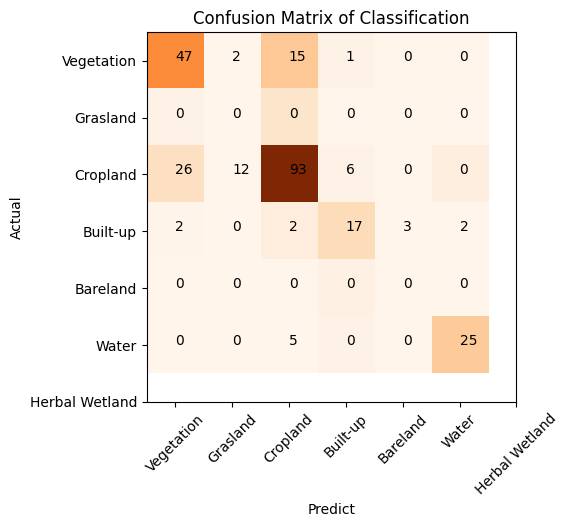

In [64]:
plt.imshow(cm, cmap='Oranges') # Show the colormap first

for i in range(cm.shape[0]): # for each row
    
    for j in range(cm.shape[1]): # for each col
        
        plt.text(i, j, cm[i, j]) # plot text of counts
        
plt.xticks(np.arange(len(labels)), labels, rotation=45) # define x labels
plt.yticks(np.arange(len(labels)), labels) # define y labels
        
plt.xlabel('Predict') # set x label
plt.ylabel('Actual') # set y label

plt.title('Confusion Matrix of Classification') # set title

plt.show()

#### Try Decision Tree

Instantiate the Decision Tree and Fit the model

In [45]:
tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

DecisionTreeClassifier()

predict the output class from trained tree

In [46]:
tree_pred = tree.predict(X_test)

Check the correctness metric

In [47]:
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           1       0.59      0.68      0.63        75
           3       0.00      0.00      0.00        14
           4       0.70      0.63      0.67       115
           5       0.56      0.62      0.59        24
           6       0.00      0.00      0.00         3
           8       0.87      0.74      0.80        27
           9       0.00      0.00      0.00         0

    accuracy                           0.62       258
   macro avg       0.39      0.38      0.38       258
weighted avg       0.63      0.62      0.62       258



/opt/anaconda3/envs/ttg-tes/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ttg-tes/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ttg-tes/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Tree is the only one model that has built-in visualizer

[Text(0.2573923057768924, 0.9722222222222222, 'x[3] <= -2.027\ngini = 0.695\nsamples = 100.0%\nvalue = [0.289, 0.053, 0.446, 0.092, 0.01, 0.107, 0.003]'),
 Text(0.043824701195219126, 0.9166666666666666, 'x[1] <= -0.782\ngini = 0.21\nsamples = 11.5%\nvalue = [0.0, 0.0, 0.087, 0.0, 0.0, 0.884, 0.029]'),
 Text(0.15060850348605578, 0.9444444444444444, 'True  '),
 Text(0.035856573705179286, 0.8611111111111112, 'gini = 0.0\nsamples = 0.3%\nvalue = [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]'),
 Text(0.05179282868525897, 0.8611111111111112, 'x[0] <= -0.334\ngini = 0.167\nsamples = 11.2%\nvalue = [0.0, 0.0, 0.06, 0.0, 0.0, 0.91, 0.03]'),
 Text(0.03187250996015936, 0.8055555555555556, 'x[1] <= -0.52\ngini = 0.065\nsamples = 9.8%\nvalue = [0.0, 0.0, 0.034, 0.0, 0.0, 0.966, 0.0]'),
 Text(0.01593625498007968, 0.75, 'x[4] <= -2.061\ngini = 0.035\nsamples = 9.3%\nvalue = [0.0, 0.0, 0.018, 0.0, 0.0, 0.982, 0.0]'),
 Text(0.00796812749003984, 0.6944444444444444, 'gini = 0.0\nsamples = 8.3%\nvalue = [0.0, 0.0, 

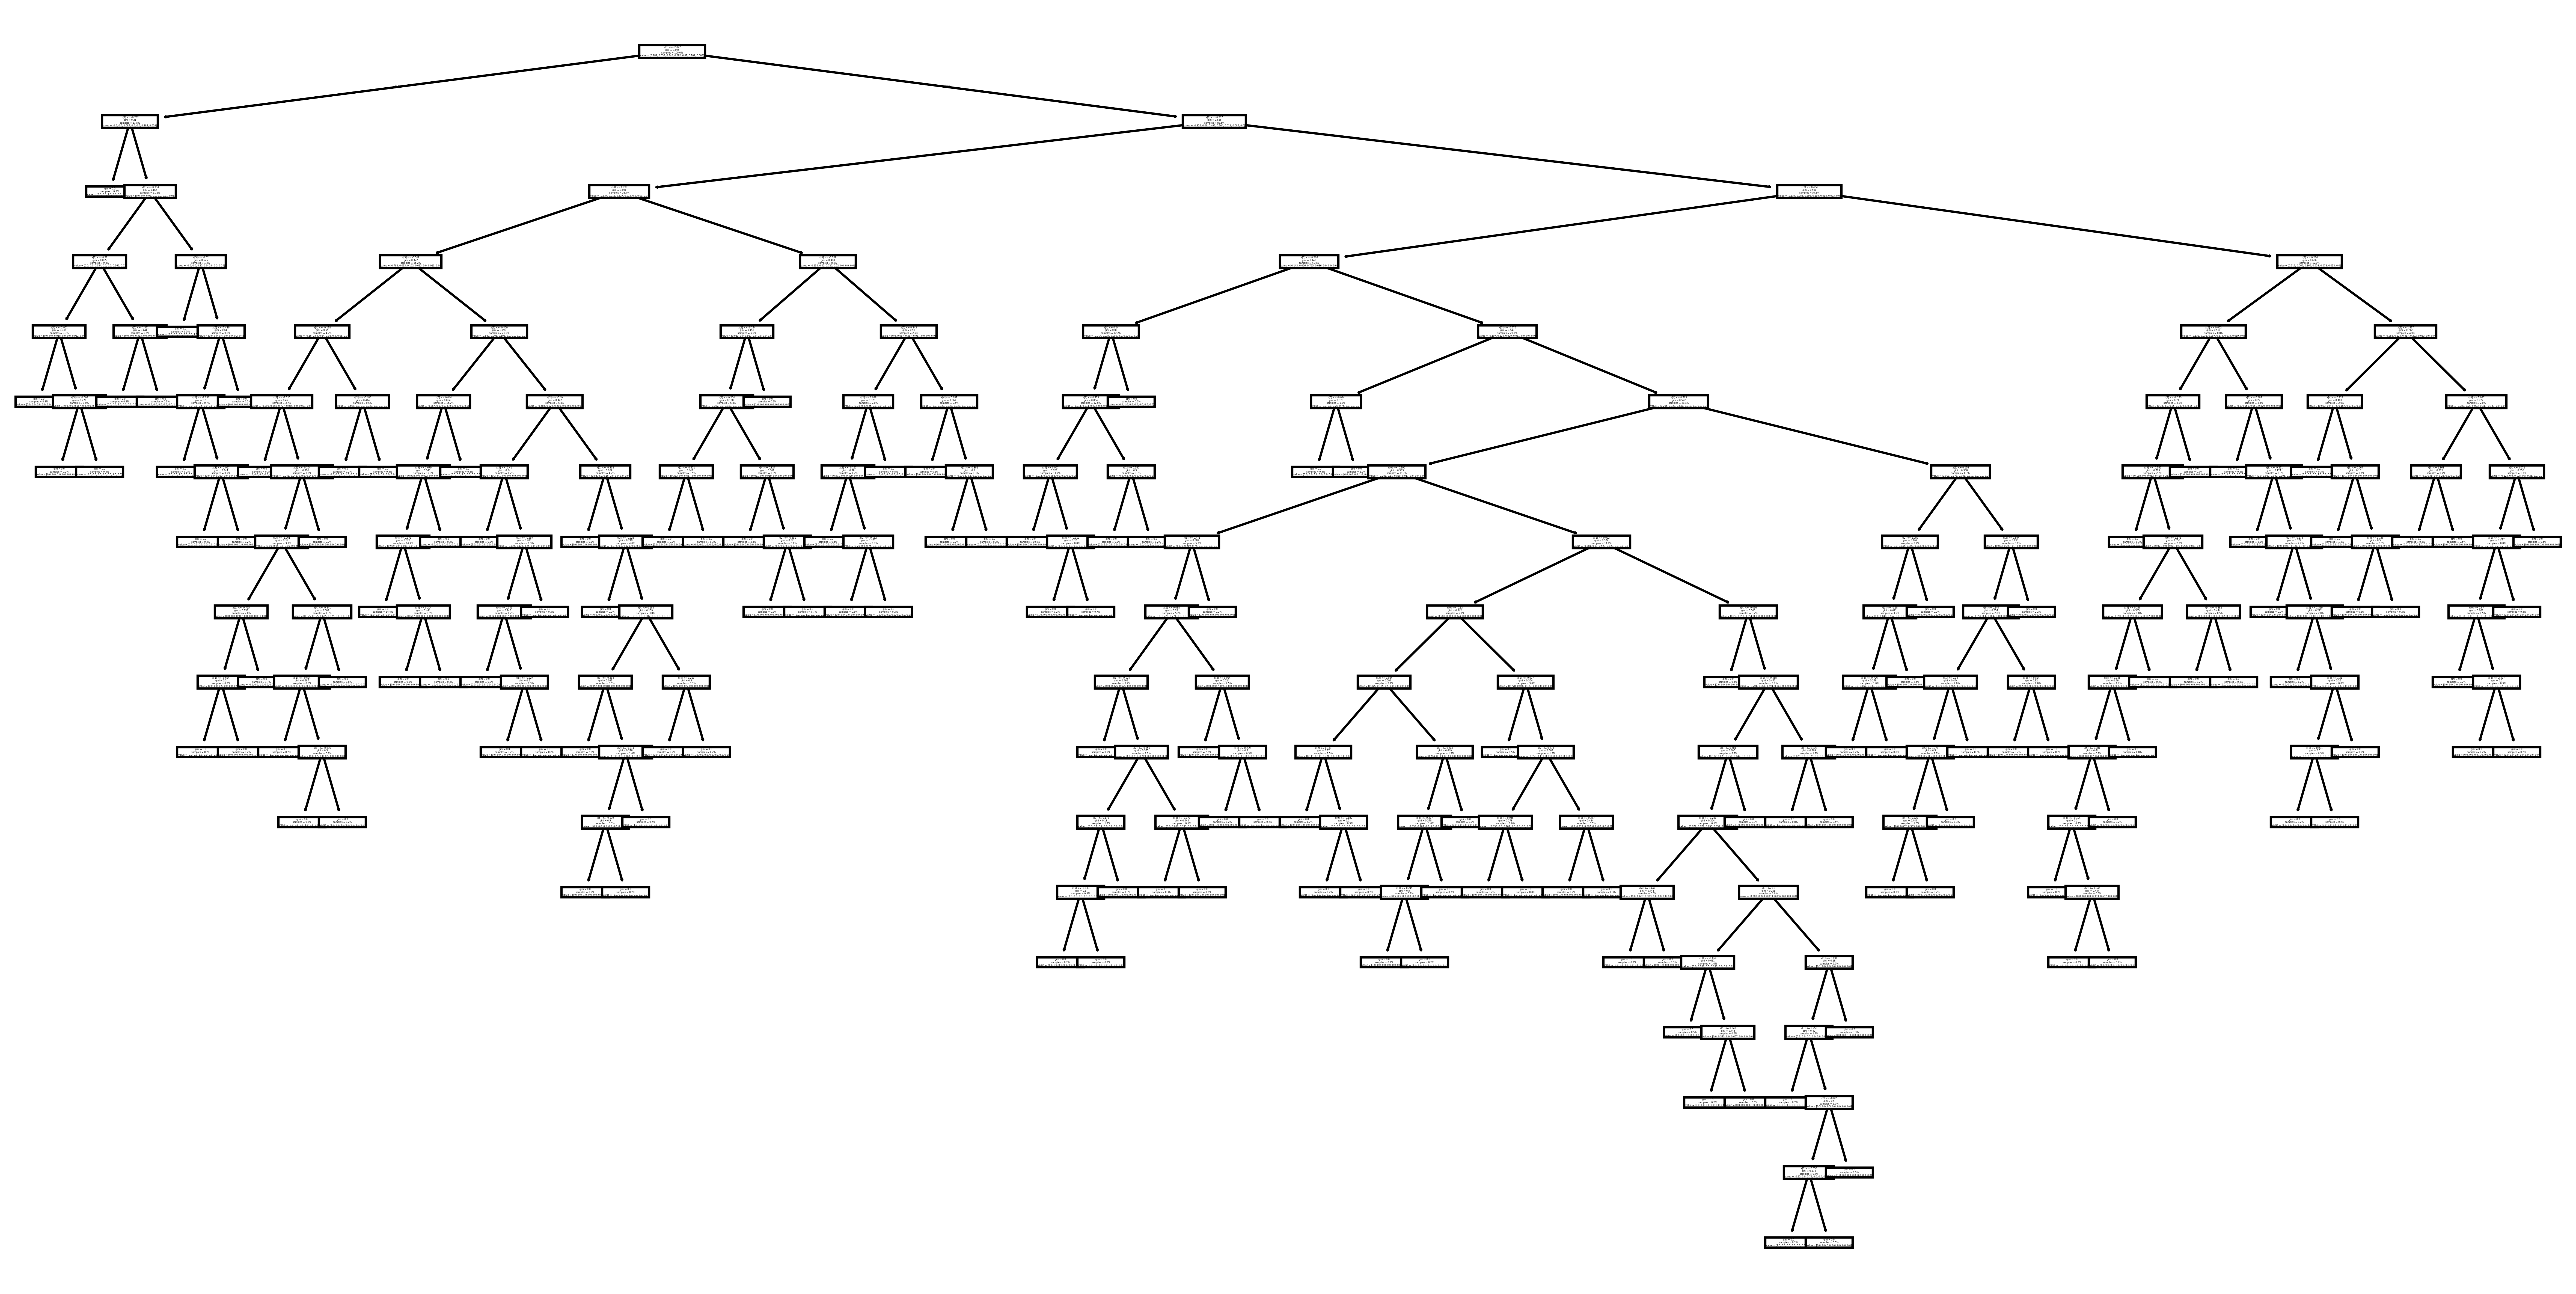

In [48]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10),dpi=600)
plot_tree(tree, proportion=True)

Plot the confution matrix of tree model

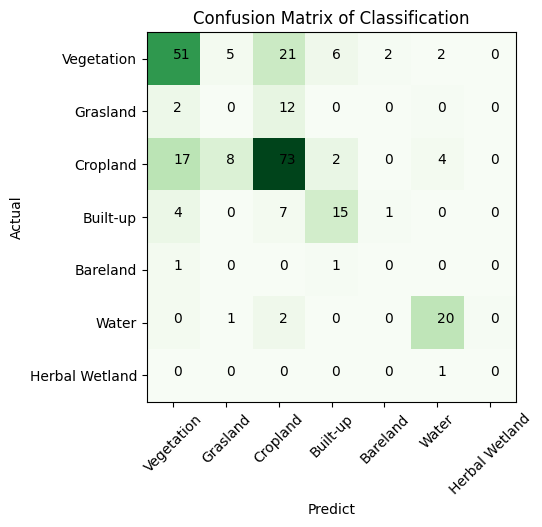

In [49]:
cm_tree = confusion_matrix(y_test, tree_pred)

plt.imshow(cm_tree, cmap='Greens') # Show the colormap first

for i in range(cm_tree.shape[0]): # for each row
    
    for j in range(cm_tree.shape[1]): # for each col
        
        plt.text(i, j, cm_tree[i, j]) # plot text of counts
        
plt.xticks(np.arange(len(labels)), labels, rotation=45) # define x labels
plt.yticks(np.arange(len(labels)), labels) # define y labels
        
plt.xlabel('Predict') # set x label
plt.ylabel('Actual') # set y label

plt.title('Confusion Matrix of Classification') # set title

plt.show()

##  Random Forest

Instantiate the Random Forest model and Fit the model

In [50]:
forest = RandomForestClassifier()

forest.fit(X_train, y_train)

RandomForestClassifier()

Predict outputs using trained model

In [51]:
forest_pred = forest.predict(X_test)

Examine classification metric

In [52]:
print(classification_report(y_test, forest_pred))

              precision    recall  f1-score   support

           1       0.64      0.67      0.65        75
           3       0.00      0.00      0.00        14
           4       0.73      0.79      0.76       115
           5       0.56      0.58      0.57        24
           6       0.00      0.00      0.00         3
           8       0.86      0.89      0.87        27

    accuracy                           0.69       258
   macro avg       0.46      0.49      0.48       258
weighted avg       0.65      0.69      0.67       258



/opt/anaconda3/envs/ttg-tes/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ttg-tes/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ttg-tes/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Plot confusion matrix

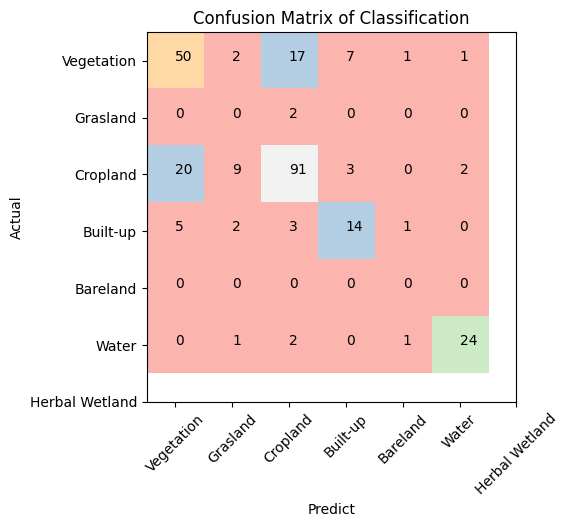

In [53]:
cm_forest = confusion_matrix(y_test, forest_pred)

plt.imshow(cm_forest, cmap='Pastel1') # Show the colormap first

for i in range(cm_forest.shape[0]): # for each row
    
    for j in range(cm_forest.shape[1]): #s for each col
        
        plt.text(i, j, cm_forest[i, j]) # plot text of counts
        
plt.xticks(np.arange(len(labels)), labels, rotation=45) # define x labels
plt.yticks(np.arange(len(labels)), labels) # define y labels
        
plt.xlabel('Predict') # set x label
plt.ylabel('Actual') # set y label

plt.title('Confusion Matrix of Classification') # set title

plt.show()

However, every model we did is default configuration. We can do searching for best combination of hyperparameters settings for best estimator.

In [66]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}


Apply __GridSearchCV__ tool with hyperparameters and fit the model similar to normal model

In [67]:

# Create a Random Forest Classifier
rf_clf = RandomForestClassifier()

# Perform Grid Search CV
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


/opt/anaconda3/envs/ttg-tes/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

The result will show the best hyperparameter setting for the model

In [68]:

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best score: 0.737843137254902


Examine the classification metric

In [ ]:
print(classification_report(y_test, grid_search.predict(X_test)))


              precision    recall  f1-score   support

           1       0.70      0.61      0.65        75
           3       0.00      0.00      0.00        14
           4       0.66      0.76      0.71       115
           5       0.50      0.58      0.54        24
           6       0.00      0.00      0.00         3
           8       0.82      1.00      0.90        27

    accuracy                           0.67       258
   macro avg       0.45      0.49      0.47       258
weighted avg       0.63      0.67      0.65       258

[[46  0 25  4  0  0]
 [ 1  0 12  1  0  0]
 [16  0 87  6  0  6]
 [ 3  0  7 14  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  0 27]]


/opt/anaconda3/envs/ttg-tes/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ttg-tes/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ttg-tes/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Check the confusion matrix with best estimator

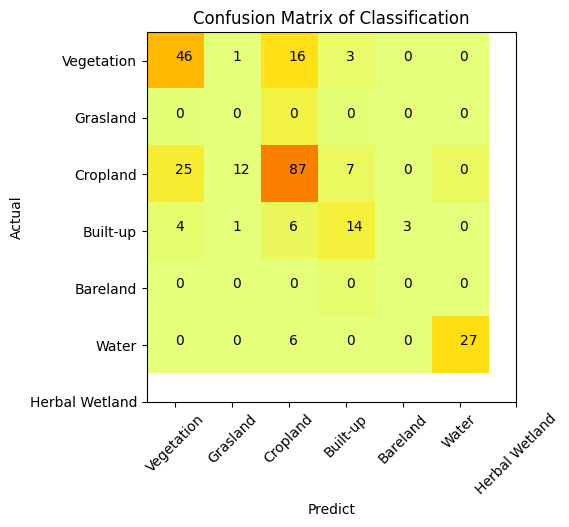

In [164]:
cm_grid =  confusion_matrix(y_test, grid_search.predict(X_test))

plt.imshow(cm_grid, cmap='Wistia') # Show the colormap first

for i in range(cm_grid.shape[0]): # for each row
    
    for j in range(cm_grid.shape[1]): #s for each col
        
        plt.text(i, j, cm_grid[i, j]) # plot text of counts
        
plt.xticks(np.arange(len(labels)), labels, rotation=45) # define x labels
plt.yticks(np.arange(len(labels)), labels) # define y labels
        
plt.xlabel('Predict') # set x label
plt.ylabel('Actual') # set y label

plt.title('Confusion Matrix of Classification') # set title

plt.show()

## Support Vector Machine

Instantiate SVM model and Fit it

In [146]:
svm = SVC()

svm.fit(X_train, y_train)

SVC()

Predict outputs using trained SVM

In [147]:
svm_pred = svm.predict(X_test)

Check classification metric

In [148]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           1       0.78      0.52      0.62        75
           3       0.00      0.00      0.00        14
           4       0.63      0.82      0.71       115
           5       0.50      0.46      0.48        24
           6       0.00      0.00      0.00         3
           8       0.75      1.00      0.86        27

    accuracy                           0.66       258
   macro avg       0.44      0.47      0.44       258
weighted avg       0.63      0.66      0.63       258



/opt/anaconda3/envs/ttg-tes/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ttg-tes/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ttg-tes/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Checl confusion matrix

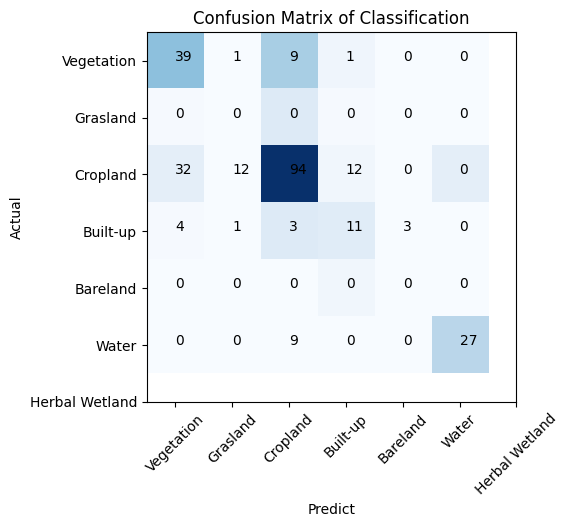

In [151]:
cm_svm = confusion_matrix(y_test, svm_pred)

plt.imshow(cm_svm, cmap='Blues') # Show the colormap first

for i in range(cm_svm.shape[0]): # for each row
    
    for j in range(cm_svm.shape[1]): #s for each col
        
        plt.text(i, j, cm_svm[i, j]) # plot text of counts
        
plt.xticks(np.arange(len(labels)), labels, rotation=45) # define x labels
plt.yticks(np.arange(len(labels)), labels) # define y labels
        
plt.xlabel('Predict') # set x label
plt.ylabel('Actual') # set y label

plt.title('Confusion Matrix of Classification') # set title

plt.show()

### Model Manipulation

After long journey of model training, there is one of ways to save the model 

In [76]:
import pickle

for simply save the model, create functions to do it

In [75]:
def save_model(model, filename):
    
    pickle.dump(model, open(filename, 'wb'))

def load_model(filename):
    
    return pickle.load(open(filename, 'rb'))

To save the model

In [77]:
save_model(model, 'logistic_reg.pkl')

Suppose to load the model from file

In [78]:
model = load_model('logistic_reg.pkl')

Test model prediction

In [169]:
model.predict(X_test)

array([1, 4, 4, 5, 4, 8, 8, 8, 4, 4, 4, 4, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1,
       4, 4, 4, 4, 8, 8, 4, 4, 1, 4, 4, 4, 8, 4, 4, 4, 4, 5, 4, 8, 5, 4,
       4, 4, 5, 4, 4, 1, 4, 4, 5, 4, 4, 1, 5, 8, 4, 1, 4, 4, 4, 4, 4, 1,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 8, 8, 4, 1, 4, 4, 4, 4, 5,
       4, 1, 4, 1, 4, 4, 4, 4, 8, 4, 4, 1, 1, 4, 4, 8, 4, 4, 4, 8, 4, 4,
       5, 1, 8, 8, 5, 4, 8, 4, 4, 8, 8, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 5,
       5, 4, 4, 1, 1, 4, 5, 4, 4, 8, 1, 8, 4, 4, 4, 1, 4, 4, 4, 8, 1, 1,
       4, 1, 4, 4, 4, 1, 8, 4, 4, 1, 4, 4, 4, 4, 4, 1, 4, 1, 4, 4, 8, 1,
       4, 4, 4, 1, 4, 4, 4, 1, 4, 8, 8, 1, 4, 4, 8, 4, 5, 4, 1, 4, 4, 4,
       4, 1, 8, 4, 4, 8, 1, 4, 4, 8, 4, 4, 4, 4, 1, 4, 1, 1, 8, 8, 1, 5,
       1, 1, 4, 4, 8, 4, 4, 1, 5, 5, 4, 4, 4, 4, 4, 4, 8, 4, 1, 4, 8, 5,
       1, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4, 5, 4, 4, 4, 4], dtype=int32)

## Map Inferencing

This is a step to actual mapping of LULC data. we need to load all of raster data each bands into a datacube to transform dataset into model predictable form. Start from load all raster data

In [63]:
datacube = []

for image_file in image_files:

    with rasterio.open(image_file) as src:
        
        datacube.append(src.read(1))
        
        image_profile = src.profile
        

Check the shape of data

In [64]:
for cube in datacube:
    print(cube.shape)

(390, 422)
(390, 422)
(390, 422)
(390, 422)
(196, 212)
(196, 212)


Try to plot one of data map

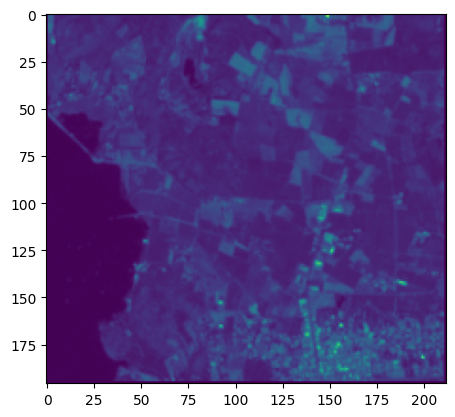

In [65]:
plt.imshow(cube)

SWIR bands are not perfectly aligned to others. do resample with zoom for image to adjust image dimension

In [66]:
from scipy import ndimage

def resample_with_zoom(arr, new_shape):
    zoom_factor = np.array(new_shape) / np.array(arr.shape)
    return ndimage.zoom(arr, zoom_factor, order=1)  # Adjust order for different interpolation

Implement to every single band

In [67]:
datacube = [resample_with_zoom(cube, (390, 422)) for cube in datacube]

Convert list-based to numpy-based datacube

In [68]:
datacube = np.dstack(datacube)
datacube.shape

(390, 422, 6)

The shape of data is ready to predict using loaded model. Then, we have to flatten the data cube into model readable

In [69]:
datacube_x = datacube.reshape(-1, 6)

Check the shape

In [70]:
datacube_x.shape

(164580, 6)

Transform the scaler for datacube since we train the model with scaled data

In [71]:
datacube_x_scaled = scaler.transform(datacube_x)

/opt/anaconda3/envs/ttg-tes/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Apply predict directly

In [72]:
lulc = model.predict(datacube_x_scaled)

Reshape the output back to original shape

In [73]:
lulc_map = lulc.reshape(390, 422)

Try to plot the image map

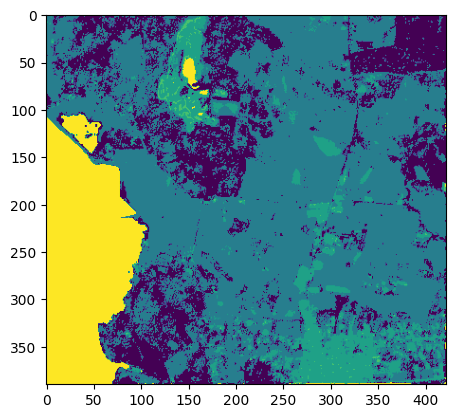

In [74]:
plt.imshow(lulc_map)

Save the file by below code

In [75]:
save_map_to = 'lulc_map.tif'

image_profile.update({"driver": "GTiff",
                    "height": lulc_map.shape[0],
                    "width": lulc_map.shape[1]})
    
# Save the clipped raster
with rasterio.open(save_map_to, "w", **image_profile) as dest:
    dest.write(lulc_map[np.newaxis,:,:])
        

## KMeans Clustering Method

This way of classification is unsupervised model which no need labels data to guide the algorithm.

We can define target number of classes in advanced and let the model grouping spectral signature themselves

In [76]:
from sklearn.cluster import KMeans

Suppose we expect to have 8 classes, we can call the model and train without put `y`

In [77]:
kmean = KMeans(n_clusters=8)

kmean.fit(datacube_x_scaled)

kmean_pred = kmean.predict(datacube_x_scaled)

After prediction, reshape the output back to original dimension

In [78]:
kmean_map = kmean_pred.reshape(390, 422)

Try to plot the image map

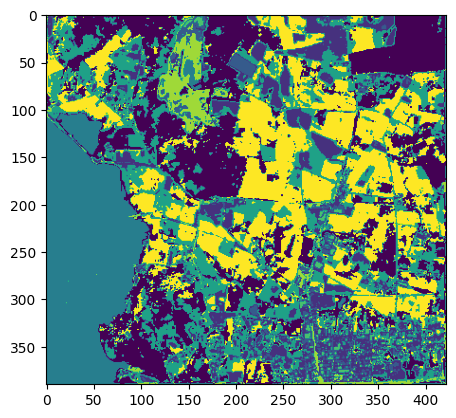

In [81]:
plt.imshow(kmean_map)

Until this step, Clustering method is usually to be used in pre-observation step. Some time it may be used in explore simialar samples to the existing reference data on ground. This helps to have more samples for training